# Face Detection with Python using OpenCV

Face detection is the process of identifying human faces in images or videos by analyzing visual input.

## OpenCV for Face Detection Tutorial

We will apply a popular face detection approach called `Haar Cascade` for face detection using OpenCV and Python.

### Intro to Haar Cascade Classifiers

This method was first introduced in the paper [Rapid Object Detection Using a Boosted Cascade of Simple Features](https://www.researchgate.net/publication/3940582_Rapid_Object_Detection_using_a_Boosted_Cascade_of_Simple_Features), written by Paul Viola and Michael Jones.

The idea behind this technique involves using a cascade of classifiers to detect different features in an image. These classifiers are then combined into one strong classifier that can accurately distinguish between samples that contain a human face from those that don’t. The Haar Cascade classifier that is built into OpenCV has already been trained on a large dataset of human faces.

---
### OpenCV for Face Detection in Images

We will build a detector to identify the human face in a Potho.

#### Step 1: Import the OpenCV and matplotlib Packages

In [2]:
import cv2
import matplotlib.pyplot as plt

#### Step 2: Read the Image

In [19]:
imagePath = 'imgs/img1.jpg'
img = cv2.imread(imagePath)
img.shape

(4000, 2667, 3)

This will load the image from the specified file path and return it in the form of a Numpy array. 

Notice that this is a 3-dimensional array. The array’s values represent the picture’s height, width, and channels respectively. Since this is a color image, there are three channels used to depict it - blue, green, and red (BGR). 

#### Step 3: Convert the Image to Grayscale

To improve computational efficiency, we first need to convert this image to grayscale before performing face detection on it:

In [20]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image.shape

(4000, 2667)

Notice that this array only has two values since the image is grayscale and no longer has the third color channel.

#### Step 4: Load the Classifier

Let’s load the pre-trained Haar Cascade classifier.

In [21]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

Notice that we are using a file called `haarcascade_frontalface_default.xml`. This classifier is designed specifically for detecting frontal faces in visual input. 

OpenCV also provides other pre-trained models to detect different objects within an image - such as a person’s eyes, smile, upper body, and even a vehicle’s license plate. You can learn more about the different classifiers built into OpenCV by examining the library’s [GitHub repository](https://github.com/opencv/opencv/tree/master/data/haarcascades).

#### Step 5: Perform the Face Detection

We can now perform face detection on the grayscale image using the classifier we just loaded:

In [22]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

Let’s break down the methods and parameters specified in the above code:

- detectMultiScale(): The detectMultiScale() method is used to identify faces of different sizes in the input image.

- `grey_image`:The first parameter in this method is called `grey_image`, which is the grayscale image we created previously.

- `scaleFactor`: This parameter is used to scale down the size of the input image to make it easier for the algorithm to detect larger faces. In this case, we have specified a scale factor of 1.1, indicating that we want to reduce the image size by 10%.

- `minNeighbors`: The cascade classifier applies a sliding window through the image to detect faces in it. You can think of these windows as rectangles. 

- `minSize`: the `minSize` parameter sets the minimum size of the object to be detected. The model will ignore faces that are smaller than the minimum size specified.

#### Step 6: Drawing a Bounding Box

Now that the model has detected the faces within the image, let’s create a bounding box around these faces:

In [23]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

The `face` variable is an array with four values: the x and y axis in which the faces were detected, and their width and height. The above code iterates over the identified faces and creates a bounding box that spans across these measurements.

The parameter `0,255,0` represents the color of the bounding box, which is green, and `4` indicates its thickness.

#### Step 7: Displaying the Image

To display the image with the detected faces, we first need to convert the image from the BGR format to RGB, Then use the Matplotlib library to display the image.

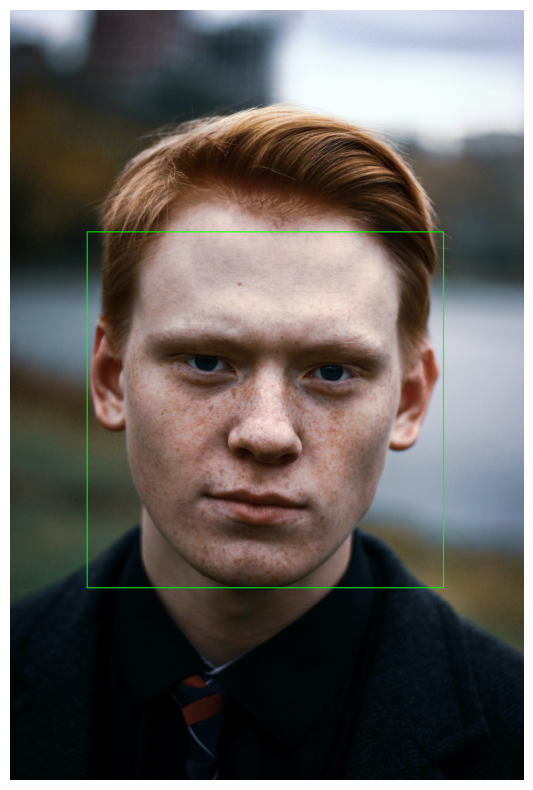

In [24]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

### Put all in One Function 

In [29]:
def detect_faces(img_path) :
    # read image
    img = cv2.imread(img_path)
    # convert to grayscale
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # load classifier
    face_classifier = cv2.CascadeClassifier(
        cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
    )
    # Detect Faces
    face = face_classifier.detectMultiScale(
        gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
    )
    # draw bounds of the face
    for (x, y, w, h) in face:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)
    # display image
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(20,10))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

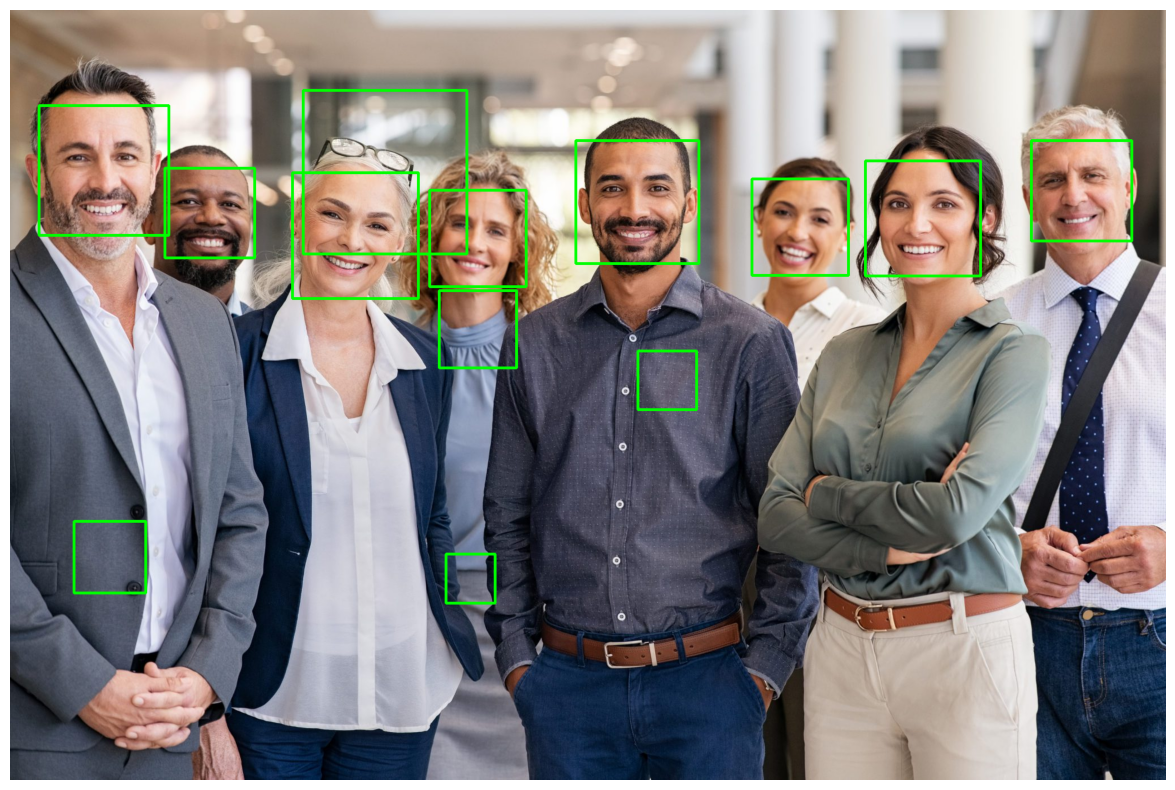

In [30]:
detect_faces('imgs/img2.jpg')

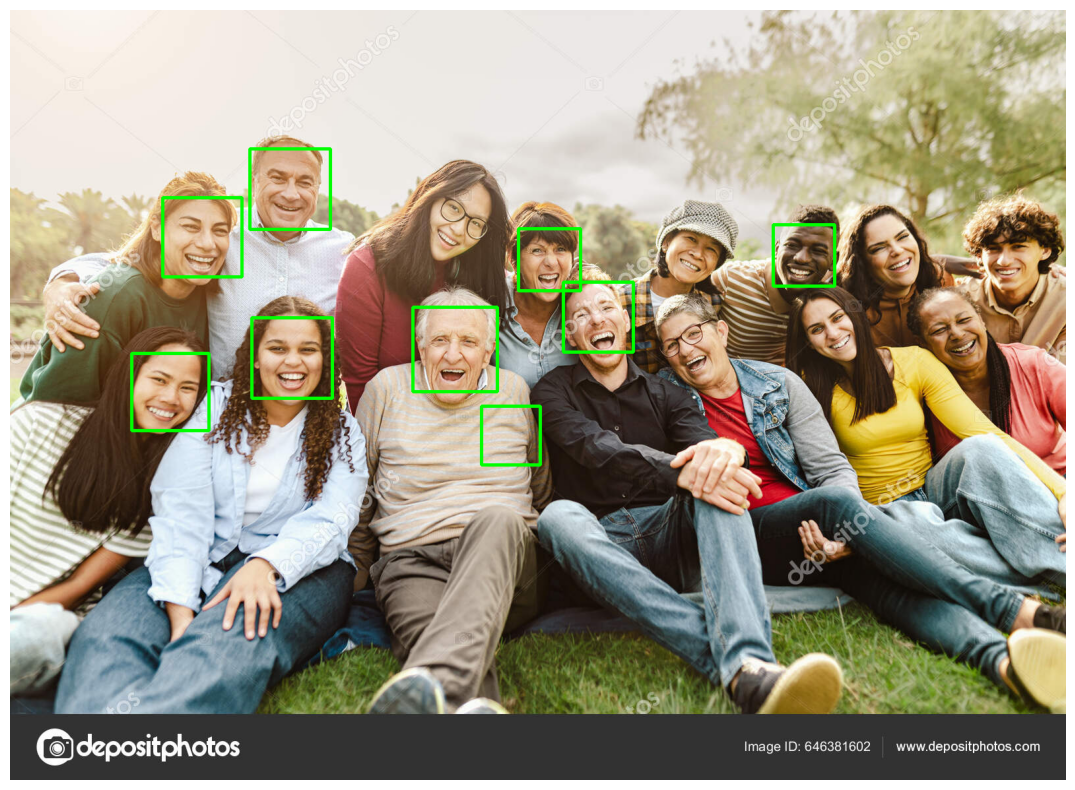

In [31]:
detect_faces('imgs/img3.jpg')

---
### Real-Time Face Detection with OpenCV

Let’s performe face detection on a live video stream. 

#### Step 1: Pre-Requisites

First, let’s go ahead and load the Haar Cascade model just like we did in the previous section. You can skip this block of code if you already ran it previously:

In [1]:
import cv2

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

#### Step 2: Access the Webcam

Now, we need to access our device’s camera to read a live stream of video data.

In [2]:
video_capture = cv2.VideoCapture(0)

Notice that we have passed the parameter `0` to the VideoCapture() function. This tells OpenCV to use the default camera on our device. If you have multiple cameras attached to your device, you can change this parameter value accordingly.

#### Step 3: Identifying Faces in the Video Stream

Now, let’s create a function to detect faces in the video stream and draw a bounding box around them:

In [3]:
def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
    return faces

The `detect_bounding_box` function takes the video frame as input.

In this function, we are using the same codes as we did earlier to convert the frame into grayscale before performing face detection.

Then, we are also detecting the face in this image using the same parameter values for `scaleFactor`, `minNeighbors`, and `minSize` as we did previously.

Finally, we draw a green bounding box of thickness `4` around the frame.

#### Step 4: Creating a Loop for Real-Time Face Detection

Now, we need to create an indefinite while loop that will capture the video frame from our webcam and apply the face detection function to it:

In [4]:
while True:

    result, video_frame = video_capture.read()  # read frames from the video
    if result is False:
        break

    faces = detect_bounding_box(
        video_frame
    )  # apply the function we created to the video frame

    cv2.imshow(
        "My Face Detection Project", video_frame
    )  # display the processed frame

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

video_capture.release()
cv2.destroyAllWindows()

After running the above code, you should see a window called `My Face Detection Project` appear on the screen:



The algorithm should track your face and create a green bounding box around it regardless of where you move within the frame.

In the frame above, the model recognizes my face and my picture on the driving license I’m holding up.

You can also test the efficacy of this model by holding up multiple pictures or by getting different people to stand at various angles behind the camera. The model should be able to identify all human faces in different backgrounds or lighting settings.

If you’d like to exit the program, you can press the “q” key on your keyboard to break out of the loop.